In [1]:
import pandas as pd
data = pd.read_csv('../data/etf/spy.csv', parse_dates=True, index_col=0)
data['42d'] = data['Close'].rolling(42).mean()

# Plot in Same Ax

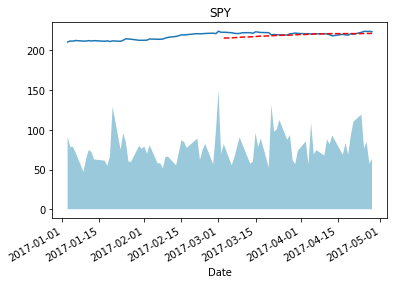

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = data['Close'].plot(title='SPY', fontsize=10)
ax = data['42d'].plot(style='r--') 
ax.fill_between(data.index, 
                0, (1e-6)*data['Volume'], 
                facecolor='#0079a3', 
                alpha=0.4)

plt.show()

# # Plot in Separate Axes

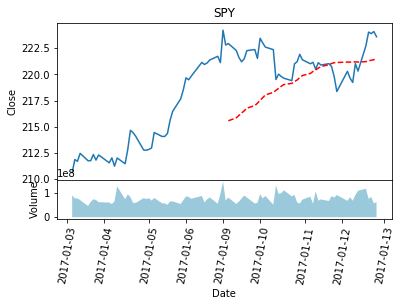

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()

#grid = plt.GridSpec(5, 1, hspace=0.2, wspace=0.0)
grid = plt.GridSpec(5, 1, hspace=0.0, wspace=0.0)

ax1 = fig.add_subplot(grid[:-1, 0])
ax1 = data['Close'].plot(title='SPY', fontsize=10)
ax1 = data['42d'].plot(style='r--') 
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax1.set_ylabel("Close") 

ax2 = fig.add_subplot(grid[-1, 0], sharex=ax1)
ax2.fill_between(data.index, 
                 0, data['Volume'], 
                 facecolor='#0079a3', 
                 alpha=0.4)
ax2.set_xlabel("Date")
ax2.set_ylabel("Volume") 
data_index = [str(time_stamp)[:10] for time_stamp in data.index]
ax2.set_xticklabels(data_index, rotation=80)

plt.show()